In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
heart_data=pd.read_csv('data.csv')

In [3]:
heart_data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
heart_data.shape

(270, 14)

In [5]:
heart_data.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [6]:
heart_data['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

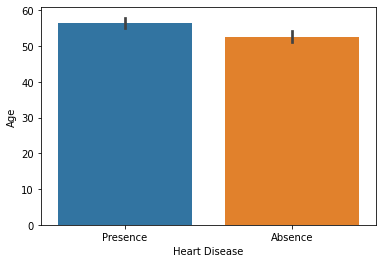

In [7]:
sns.barplot(x='Heart Disease',y='Age', data=heart_data)
plt.show()

In [8]:
data=heart_data.dropna()

In [9]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [10]:
data.shape

(270, 14)

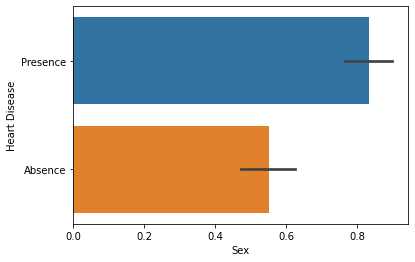

In [11]:
sns.barplot(y='Heart Disease',x='Sex', data=heart_data)
plt.show()

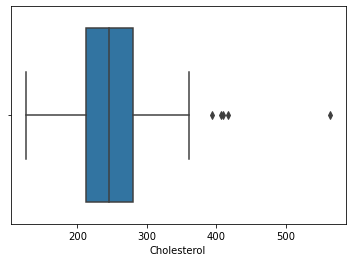

In [12]:
sns.boxplot(x='Cholesterol', data=data)
plt.show()

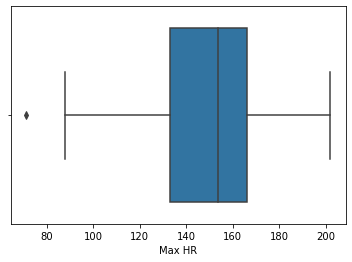

In [13]:
sns.boxplot(x='Max HR', data=data)
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [16]:
data['Heart Disease'].unique()

array(['Presence', 'Absence'], dtype=object)

In [17]:
label=LabelEncoder()

data['Heart Disease']=label.fit_transform(data['Heart Disease'])

In [18]:
data['Heart Disease'].unique()

array([1, 0])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int32  
dtypes: float64(1), int32(1), i

In [20]:
X=data.iloc[:,:-1]
X.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object')

In [21]:
Y=data.iloc[:,13:]
Y.columns

Index(['Heart Disease'], dtype='object')

In [22]:
X.shape

(270, 13)

In [23]:
Y.shape

(270, 1)

In [24]:
from sklearn.model_selection import train_test_split


In [25]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [26]:
print('train_data:',len(x_train))

train_data: 189


In [27]:
print('test_data:',len(x_test))

test_data: 81


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier


In [29]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
svc=SVC()
adb=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
rf=RandomForestClassifier()

In [30]:
algorithms=[lr,dt,svc,adb,gbc,rf]

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
for x in algorithms:
    x.fit(x_train,y_train)
    pre=x.predict(x_test)
    print(x,'accuracy:',accuracy_score(pre,y_test)*100)
    

C:\Users\vicky\Anaconda3\envs\admin\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\vicky\Anaconda3\envs\admin\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\vicky\Anaconda3\envs\admin\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

LogisticRegression() accuracy: 85.18518518518519
DecisionTreeClassifier() accuracy: 76.5432098765432
SVC() accuracy: 58.0246913580247
AdaBoostClassifier() accuracy: 81.48148148148148
GradientBoostingClassifier() accuracy: 77.77777777777779


C:\Users\vicky\Anaconda3\envs\admin\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\vicky\Anaconda3\envs\admin\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier() accuracy: 83.9506172839506


In [33]:
lr.fit(x_train,y_train)
model=lr.predict(x_test)
print('LogisticRegression:',accuracy_score(model,y_test))

LogisticRegression: 0.8518518518518519


C:\Users\vicky\Anaconda3\envs\admin\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\vicky\Anaconda3\envs\admin\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [35]:
rf.fit(x_train,y_train)
model1=rf.predict(x_test)
print('Randomforest:',accuracy_score(model,y_test))

C:\Users\vicky\Anaconda3\envs\admin\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Randomforest: 0.8024691358024691


In [36]:
model1[:10]

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1])

In [37]:
y_test.head(10)

,Heart Disease
111,0
170,0
106,0
105,1
121,1
49,1
132,0
163,1
228,0
35,1


In [38]:
import joblib
joblib.dump(rf,'model1.pkl')

['model1.pkl']